**Импорт библиотек**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Изучение общей информации

In [2]:
data = pd.read_csv('/real_estate_data.csv', sep='\t')

In [3]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
data.shape

(23699, 22)

In [6]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [7]:
(data.isna().mean()*100).round(2)

total_images             0.00
last_price               0.00
total_area               0.00
first_day_exposition     0.00
rooms                    0.00
ceiling_height          38.80
floors_total             0.36
living_area              8.03
floor                    0.00
is_apartment            88.29
studio                   0.00
open_plan                0.00
kitchen_area             9.61
balcony                 48.61
locality_name            0.21
airports_nearest        23.38
cityCenters_nearest     23.29
parks_around3000        23.28
parks_nearest           65.91
ponds_around3000        23.28
ponds_nearest           61.56
days_exposition         13.42
dtype: float64

In [8]:
data.duplicated().sum()

0

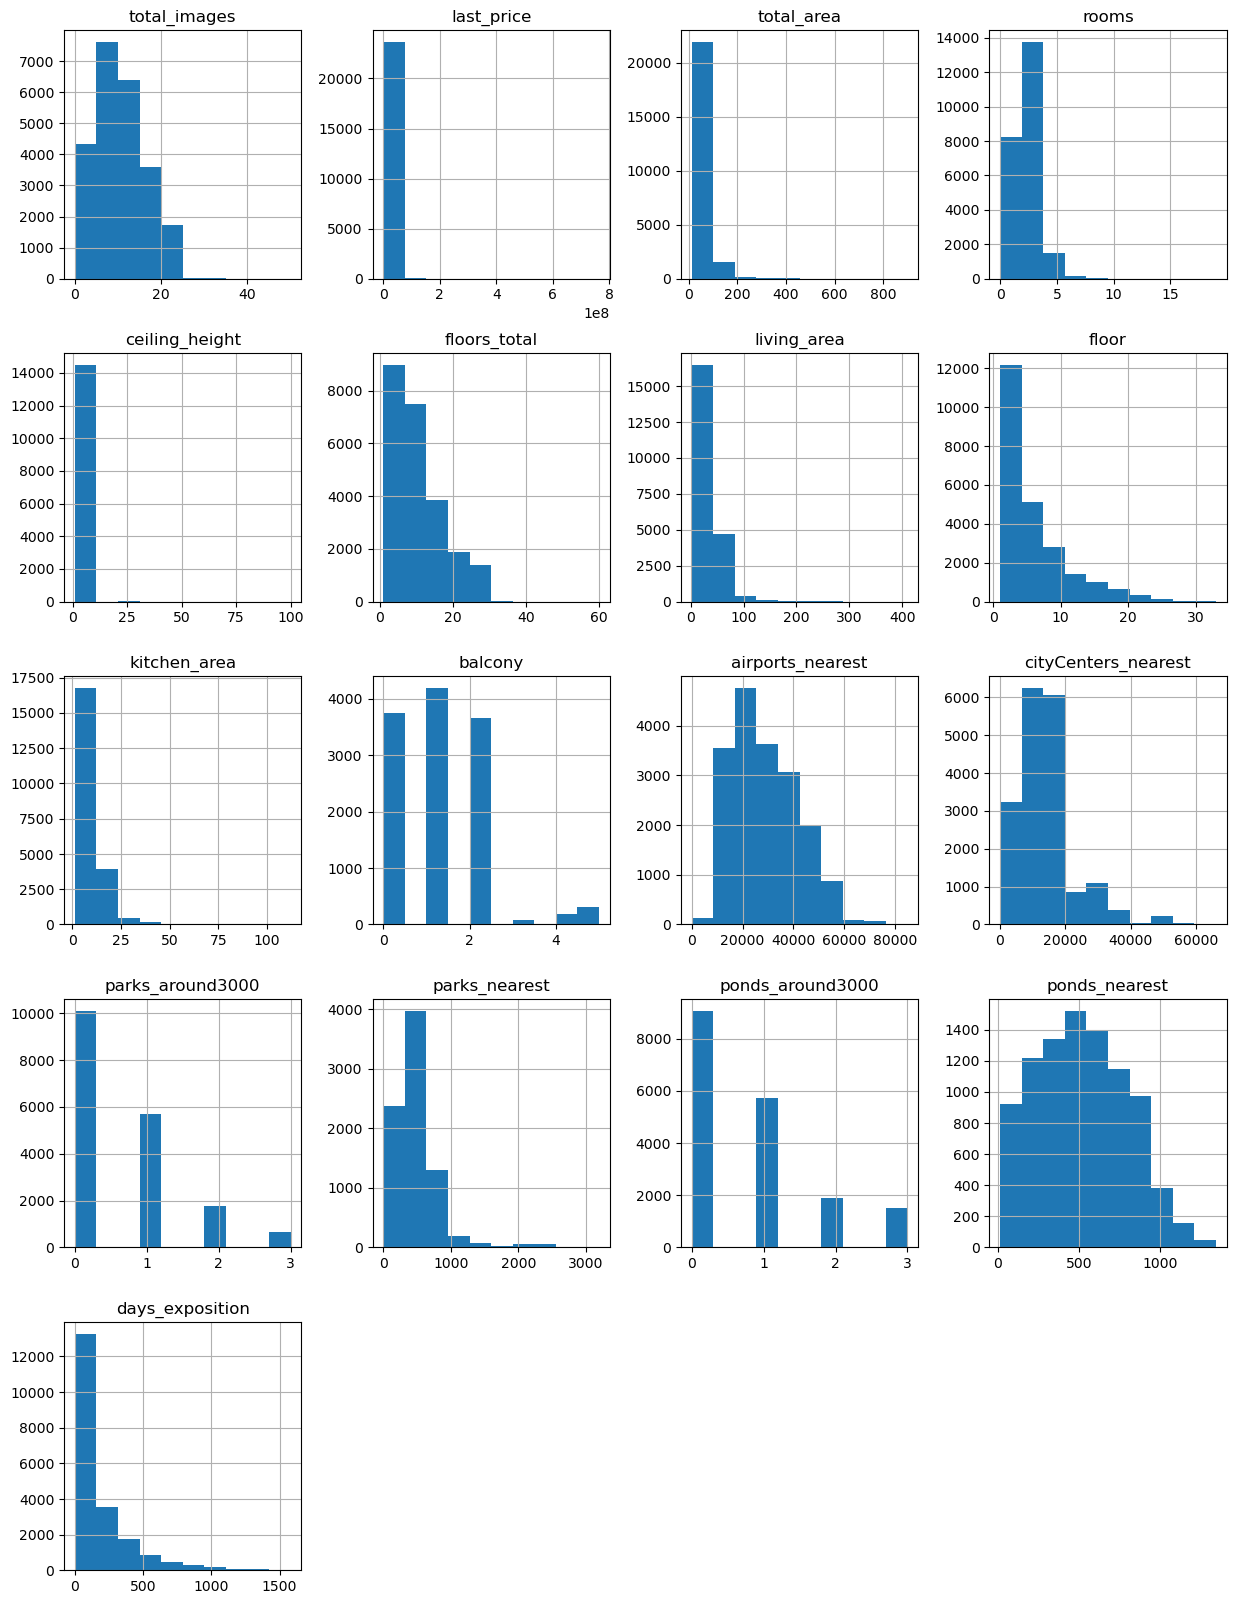

In [9]:
data.hist(figsize=(15,20));

## Предобработка данных

Изменение названия столбца:

In [10]:
data = data.rename(columns={'cityCenters_nearest': 'city_center_nearest'})

Замена формата даты и времени

In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Замена пустных значений балконов. Предположим, что пропущенные значения говорят об отсутствии баклона.

In [12]:
data['balcony'] = data['balcony'].fillna(0)

Замена значений в колонке апартоменты на false если отсутствует значение:


In [13]:
data['is_apartment'] = data['is_apartment'] == True

Удаление пропусков с населёнными пунктами и общим кол-ом этажей. Малое количество пропусков в этой колонке позволяет их исключить.

In [14]:
data = data.dropna(subset=['locality_name','floors_total'])

Устранение не явных дубликатов

In [15]:
def rename(name):
    if 'ё' in name:
        return name.replace('ё', 'е')
    return name

def rename_all(name):
    if 'поселок городского типа ' in name:
        return name.replace('поселок городского типа ', '')
    elif 'садовое товарищество ' in name:
        return name.replace('садовое товарищество ', '')
    elif 'городской поселок ' in name:
        return name.replace('городской поселок ', '')
    elif 'поселок при железнодорожной станции ' in name:
        return name.replace('поселок при железнодорожной станции ', '')
    elif 'коттеджный поселок ' in name:
        return name.replace('коттеджный поселок ', '')
    elif 'деревня ' in name:
        return name.replace('деревня ', '')
    elif 'село ' in name:
        return name.replace('село ', '')
    elif 'поселок ' in name:
        return name.replace('поселок ', '')
    return name


data['locality_name']=data['locality_name'].apply(rename)
data['locality_name']=data['locality_name'].apply(rename_all)

In [16]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

**Устранение аномальных значений:**

In [17]:
def median(col):
    for row in data[col].unique():
        data.loc[(data[col].isna(), col)] = \
        data.loc[(data[col] == row), col].median()       

In [18]:
median('ceiling_height')
median('living_area')
median('kitchen_area')

In [19]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
city_center_nearest      5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

Проверка аномальных значений "ceiling_height":

(0.0, 10.0)

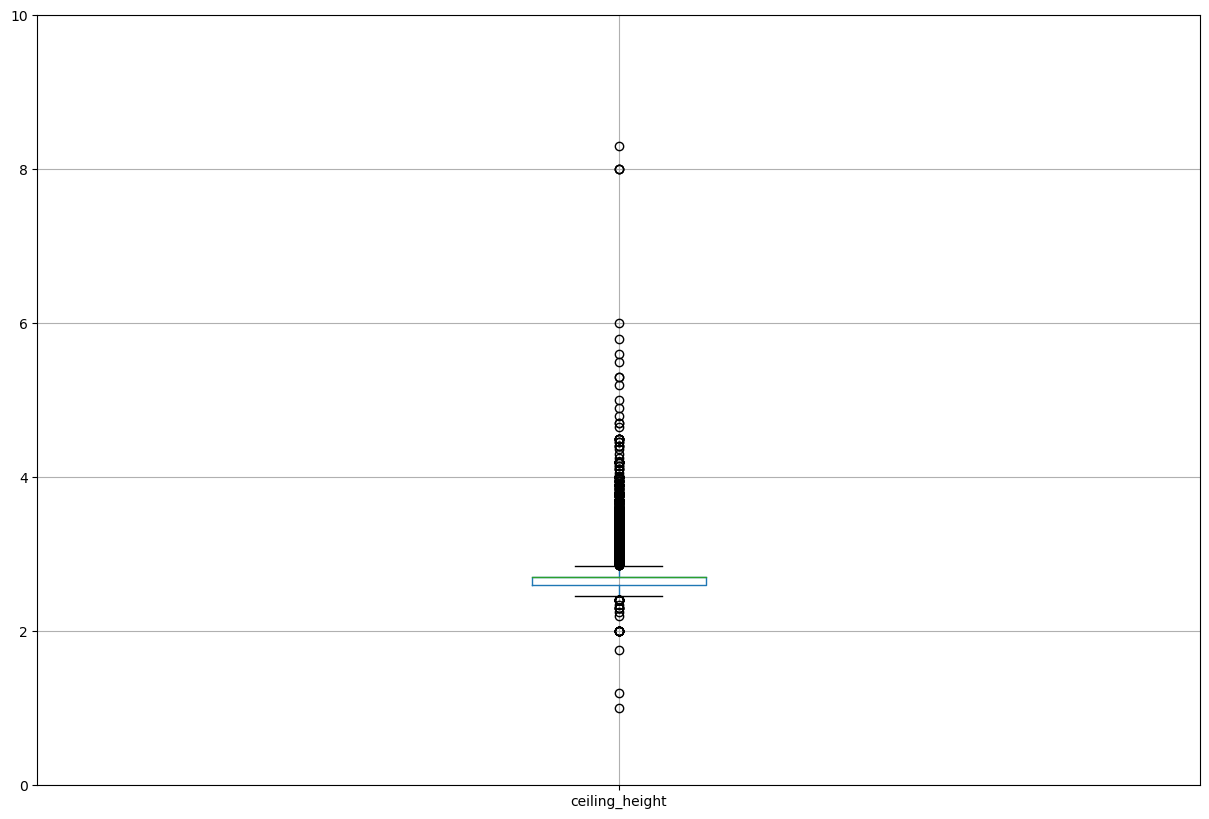

In [20]:
data.boxplot(column='ceiling_height', figsize=(15,10));
plt.ylim(0,10)

Предлагаю удалить строки со значениями "ceiling_height" меньше 2 м и больше 4

In [21]:
len(data.query('2 < ceiling_height < 4'))

23438

In [22]:
data = data.query('2 < ceiling_height < 4')

Проверка аномальных значений "living_area":

(0.0, 300.0)

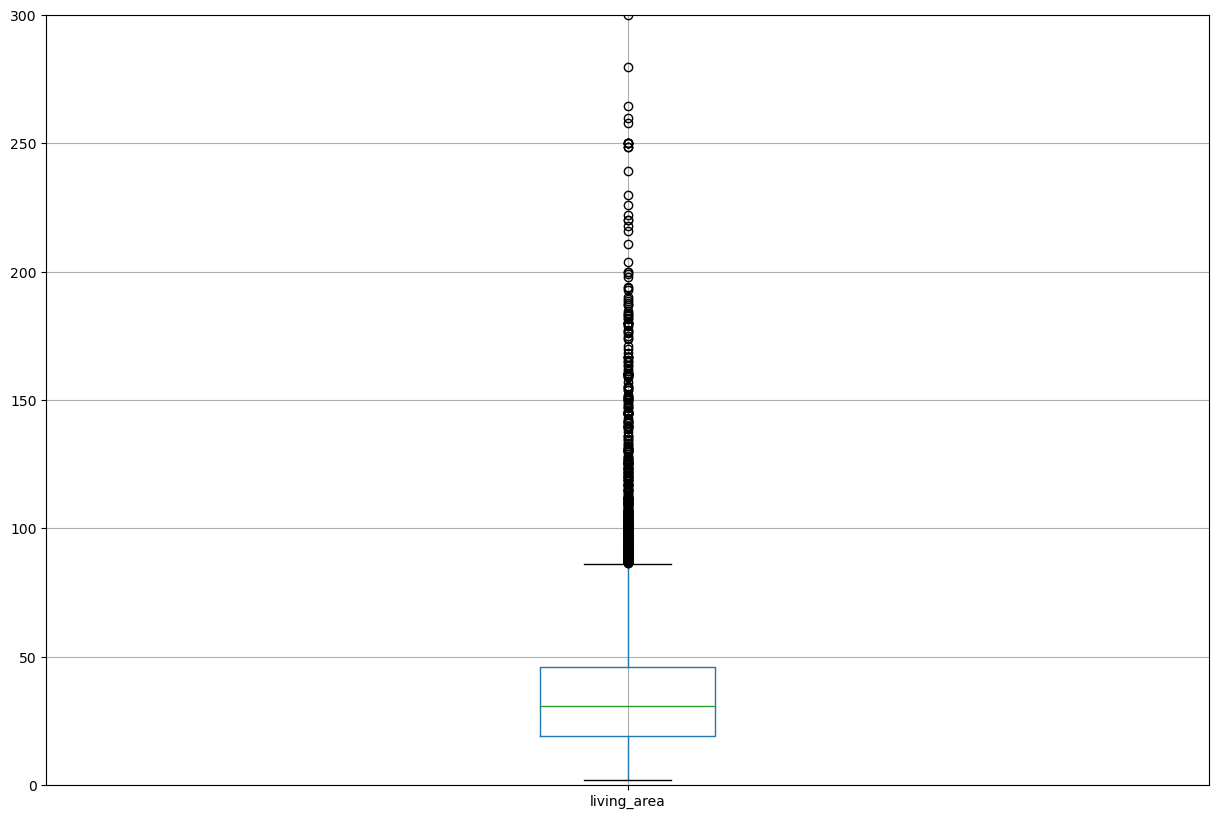

In [23]:
data.boxplot(column='living_area', figsize=(15,10))
plt.ylim(0, 300)

In [24]:
data['living_area'].describe()

count    23438.000000
mean        35.605565
std         21.134694
min          2.000000
25%         19.000000
50%         31.000000
75%         46.000000
max        409.700000
Name: living_area, dtype: float64

In [25]:
len(data.query('living_area < 10'))

25

In [26]:
len(data.query('living_area > 250'))

10

На диаграмме размаха видно, что в столбце "living_area" присутствую значения в 2 м2 и больше 300 м2. Исключим значения меньше 10 м2 и больше 250 м2.

In [27]:
data = data.query('10 < living_area < 250')

Изучим знаечния в столбце kitchen_area

<AxesSubplot:>

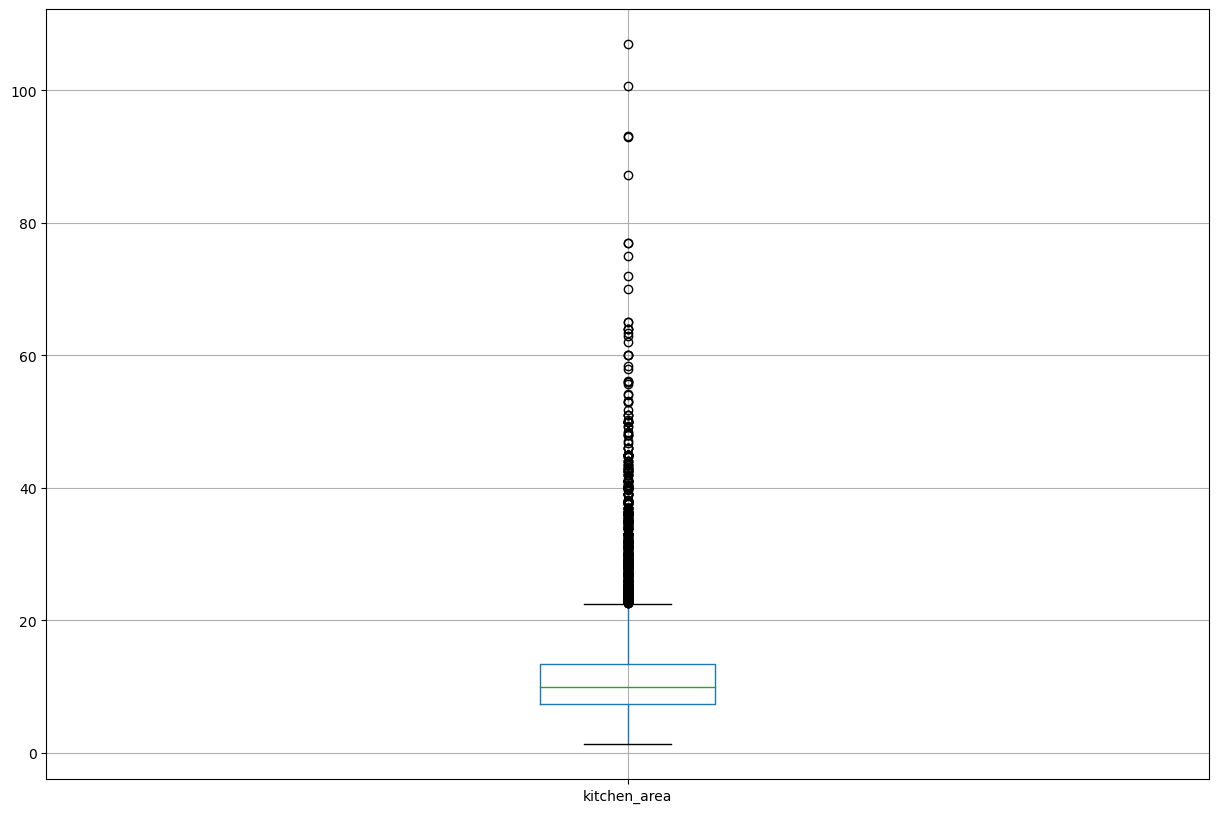

In [28]:
data.boxplot(column='kitchen_area', figsize=(15,10))

In [29]:
data['kitchen_area'].describe()

count    23367.000000
mean        11.856677
std          6.879146
min          1.300000
25%          7.300000
50%         10.000000
75%         13.400000
max        107.000000
Name: kitchen_area, dtype: float64

Заменим значения kitchen_area меньше 4 и больше 60 на более реальные.

In [30]:
data['kitchen_area'] = data['kitchen_area'].where(data['kitchen_area'] > 4, data['kitchen_area'] * 3.5)
data['kitchen_area'] = data['kitchen_area'].where(data['kitchen_area'] <= 60, data['kitchen_area'] / 10)

In [31]:
data['kitchen_area'].describe()

count    23367.000000
mean        11.823391
std          6.625628
min          4.100000
25%          7.300000
50%         10.000000
75%         13.400000
max         60.000000
Name: kitchen_area, dtype: float64

Изучение аномалий в колонке комнаты:

In [32]:
len(data.query('rooms > 10'))

5

In [33]:
data['rooms'].describe()

count    23367.000000
mean         2.065263
std          1.058211
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

In [34]:
data = data.query('rooms <= 10')

**Промежуточный вывод**

Пропуски в таких колонках как "высота потолка", "площадь кухни" и "жилая площадь" предлагаю оставить незаполненными, а работать с имеющимися данными. Их заполнение средними или медианными значениями не рационально, в связи с возможностью искажения дальнейшего исследования. Общая планировка в разных населённых пунктах может различаться друг от друга, а также в общую площадь квартиры дополнительно входят места общего пользования, санитарные узлы и помещения общего назначения. Их отсутствие скажется при заполнении пустых значений в площадях.

### Посчитайте и добавьте в таблицу новые столбцы

Создани столбца со стоимостью квадратного метра:

In [35]:
data['square_price'] = (data['last_price']/data['total_area']).round(2)

Создание столца с днем публикации:

In [36]:
data['posting_day'] = data['first_day_exposition'].dt.weekday

Создание столбца с месяцем публикации:

In [37]:
data['posting_month'] = data['first_day_exposition'].dt.month

Создание столбца с годом публикации:

In [38]:
data['posting_year'] = data['first_day_exposition'].dt.year

Создание столбца с типом этажа "первый", "последний", "другой"

In [39]:
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

data['floor_type'] = data.apply(floor_type, axis=1)

In [40]:
data['floor_type'].value_counts()

другой       17193
последний     3283
первый        2886
Name: floor_type, dtype: int64

Перевод значений столбца близости к центру городка из метры в километры и округление:

In [41]:
data['city_center_nearest'] = (data['city_center_nearest']/1000).round(0)

**Промежуточный вывод**


Созданы столбцы с необходимым набором данных для проведения дальнейшего исследования.

### Проведите исследовательский анализ данных

Изучение общей площади

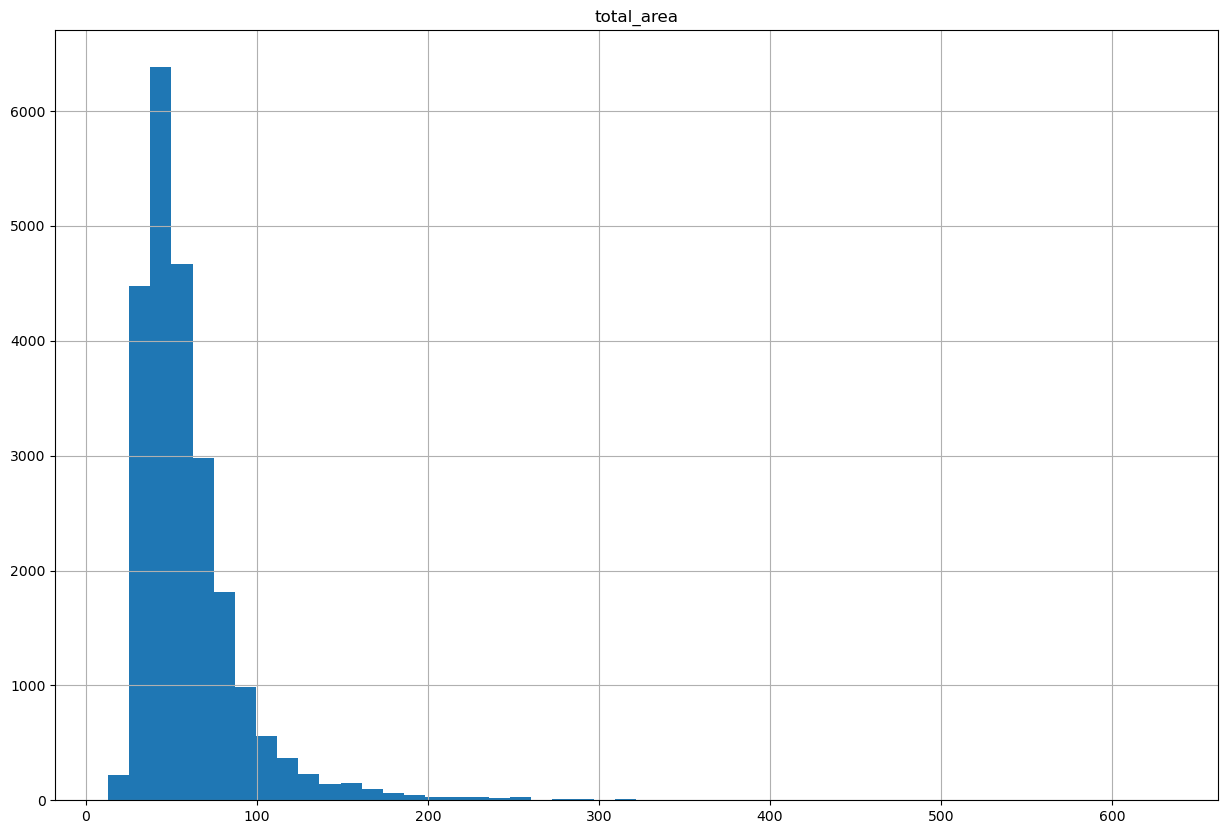

In [42]:
data.hist(column='total_area', bins=50, figsize=(15,10));

array([[<AxesSubplot:title={'center':'total_area'}>]], dtype=object)

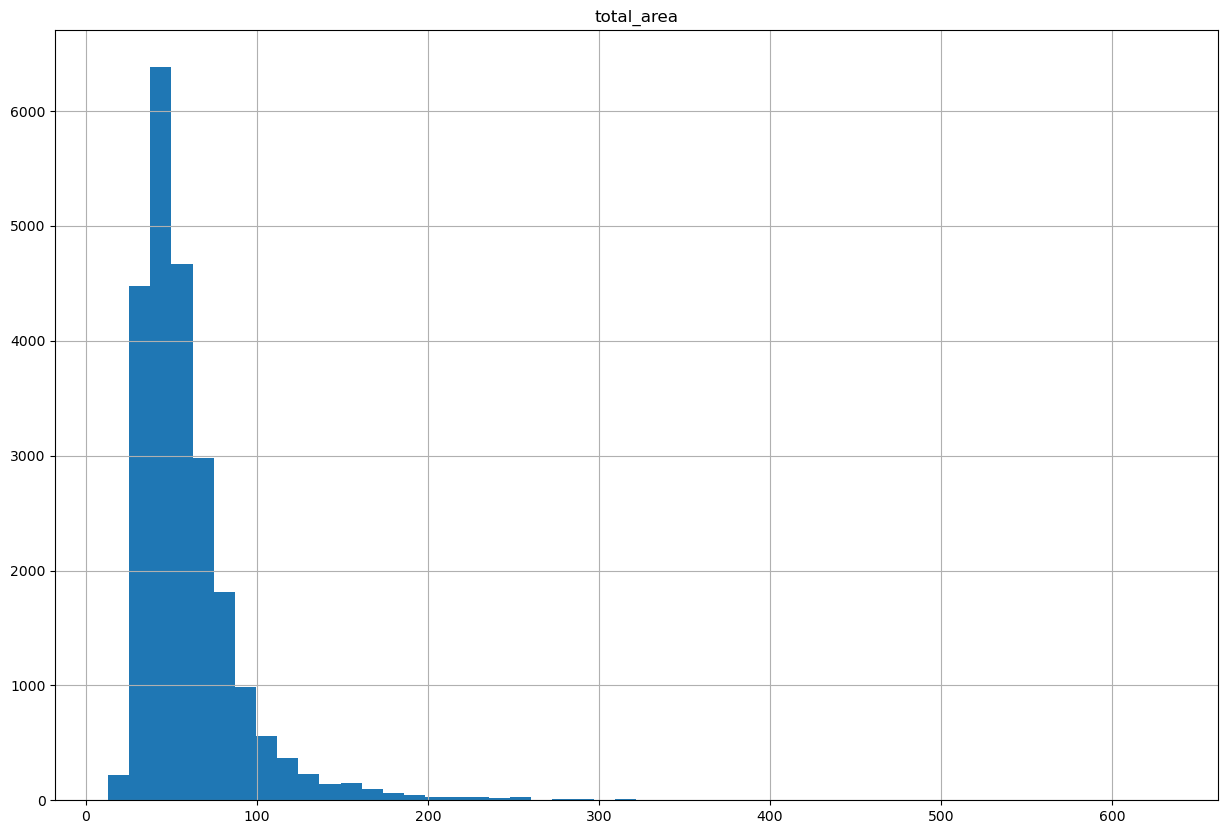

In [43]:
data.hist(column='total_area', bins=50, figsize=(15,10))

Вывод: больше всего объявлений по продаже квартир около 50 м2.

Изучение жилой площади:

array([[<AxesSubplot:title={'center':'living_area'}>]], dtype=object)

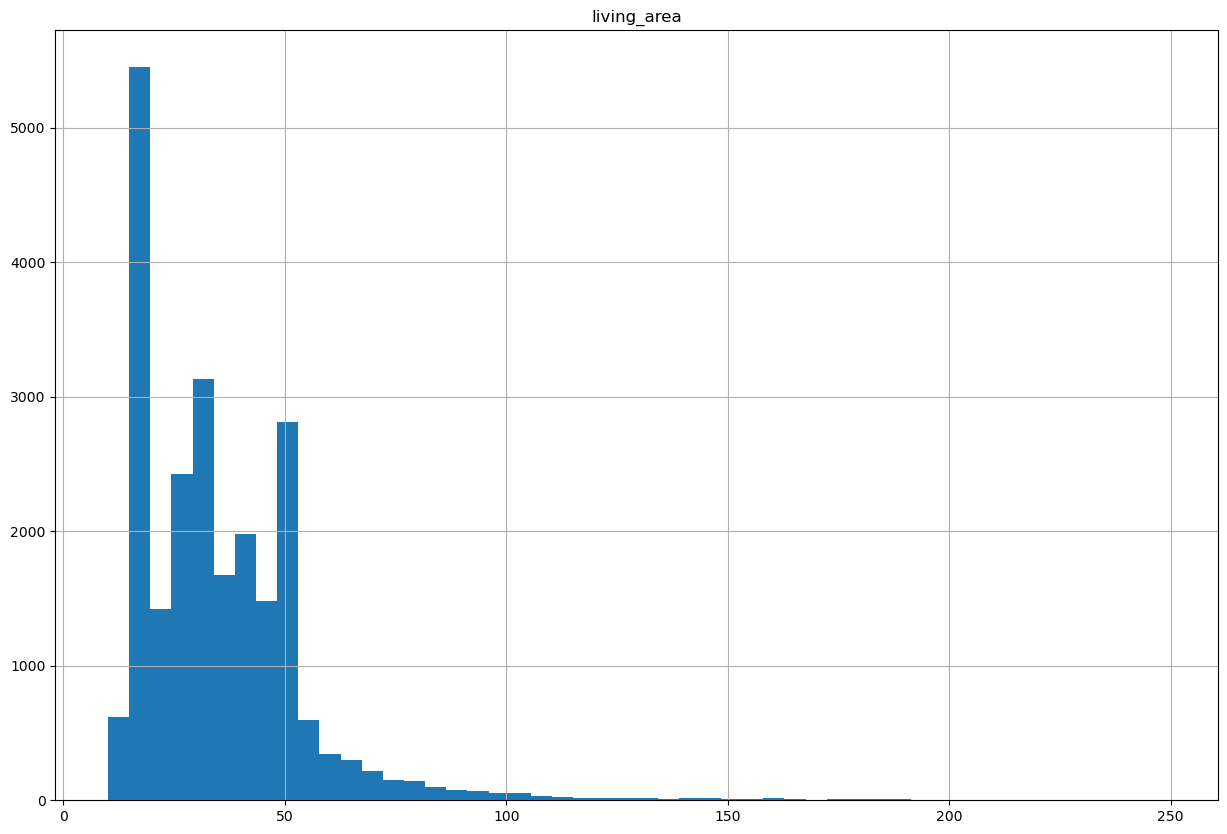

In [44]:
data.hist(column='living_area', bins=50, figsize=(15,10))

Вывод: больше всего объявлений по продаже квартир с жилой площадью около 25 м2.

Изучение площади кухни:

array([[<AxesSubplot:title={'center':'kitchen_area'}>]], dtype=object)

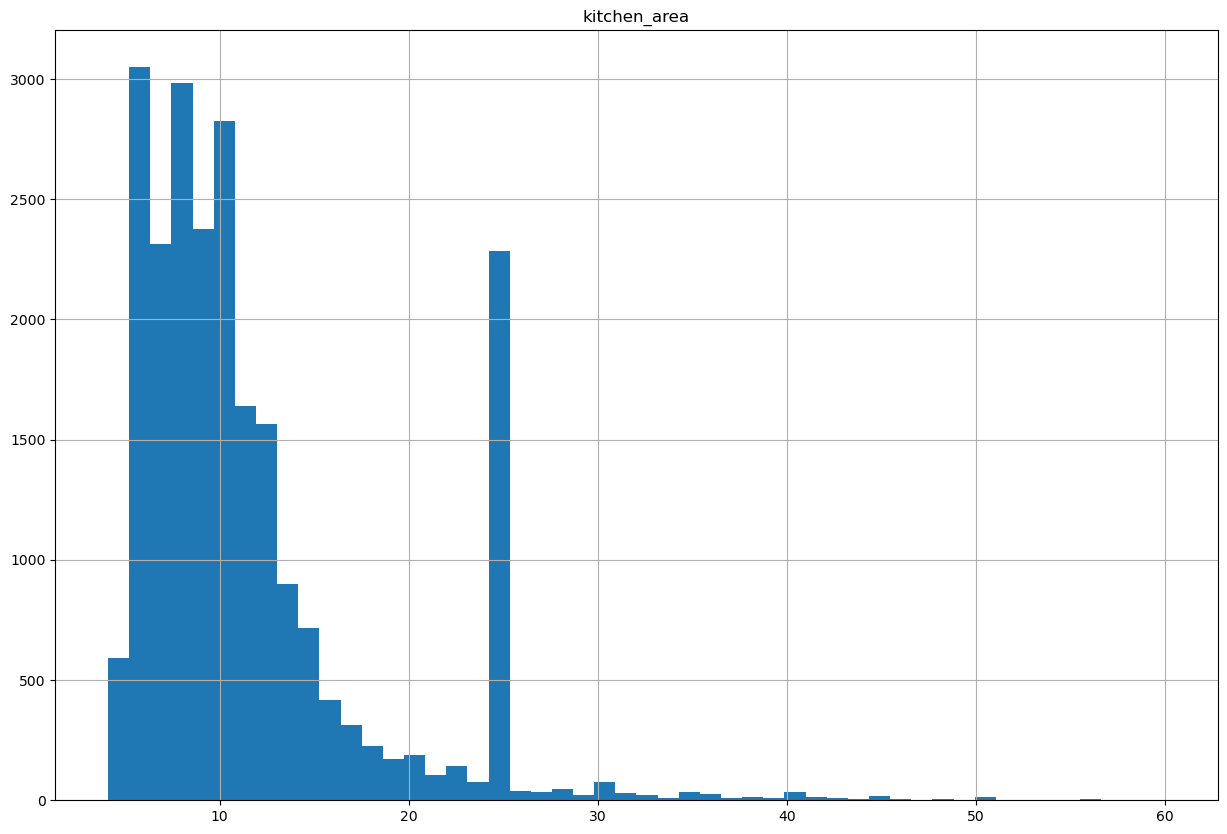

In [45]:
data.hist(column='kitchen_area', bins=50, figsize=(15,10))

Вывод: больше всего объявлений с площадью кухни до 12 м2. Наблюдается резкий скачек значений с площадь 25 м2.

Изучение общей стоимости:

array([[<AxesSubplot:title={'center':'last_price'}>]], dtype=object)

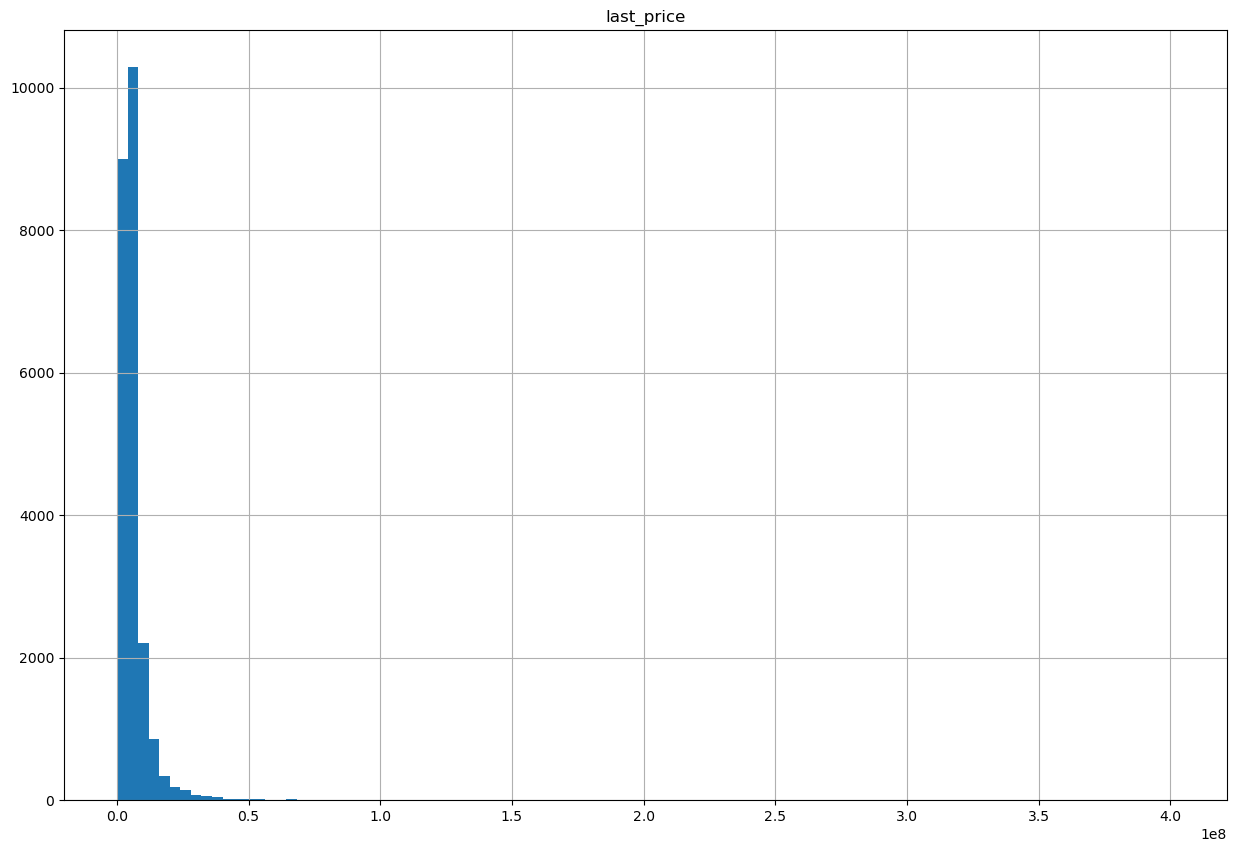

In [46]:
data.hist(column='last_price', bins=100, figsize=(15,10))

Вывод: больше всего объявлений с общей стоимостью около 10 млн. руб.

Изучение количества комнат:

array([[<AxesSubplot:title={'center':'rooms'}>]], dtype=object)

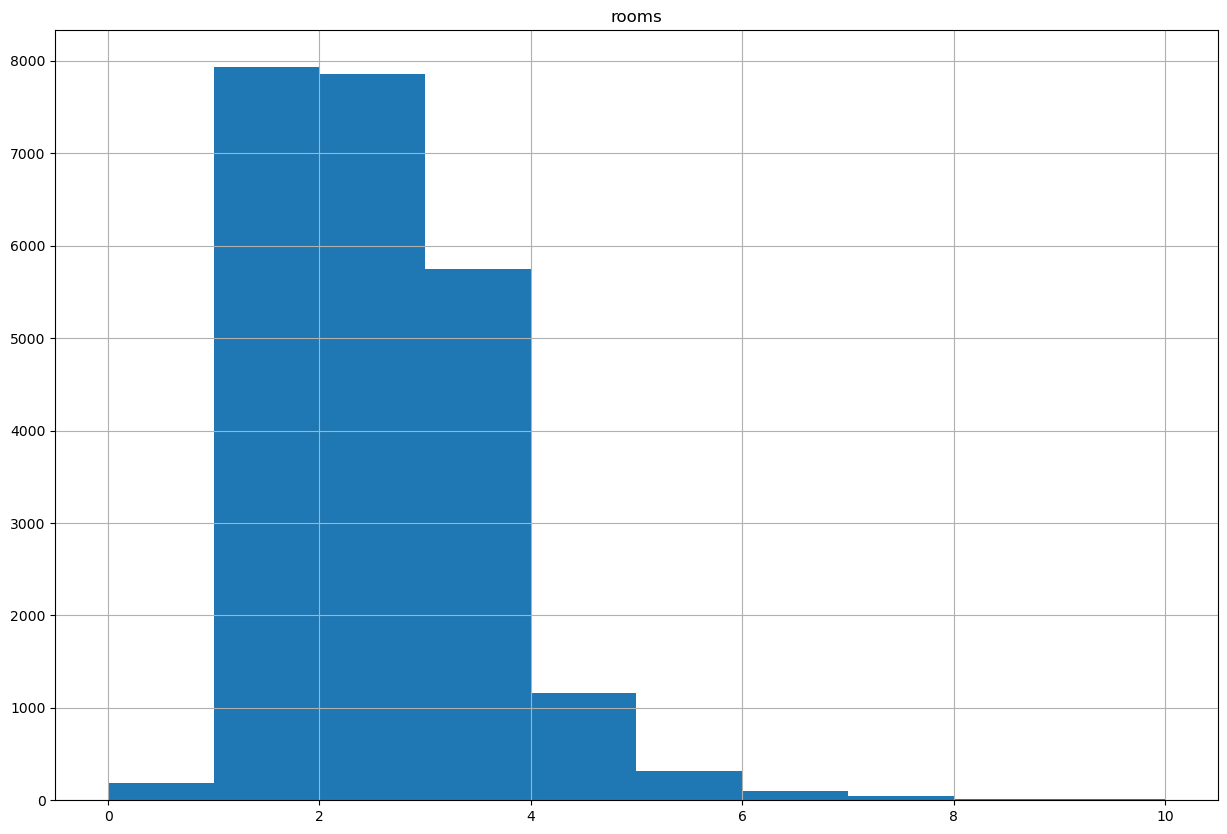

In [47]:
data.hist(column='rooms', bins=10, figsize=(15,10))

Вывод: больше всего объявлений с количеством комнат от 1 до 3.

Изучение высоты потолка:

array([[<AxesSubplot:title={'center':'ceiling_height'}>]], dtype=object)

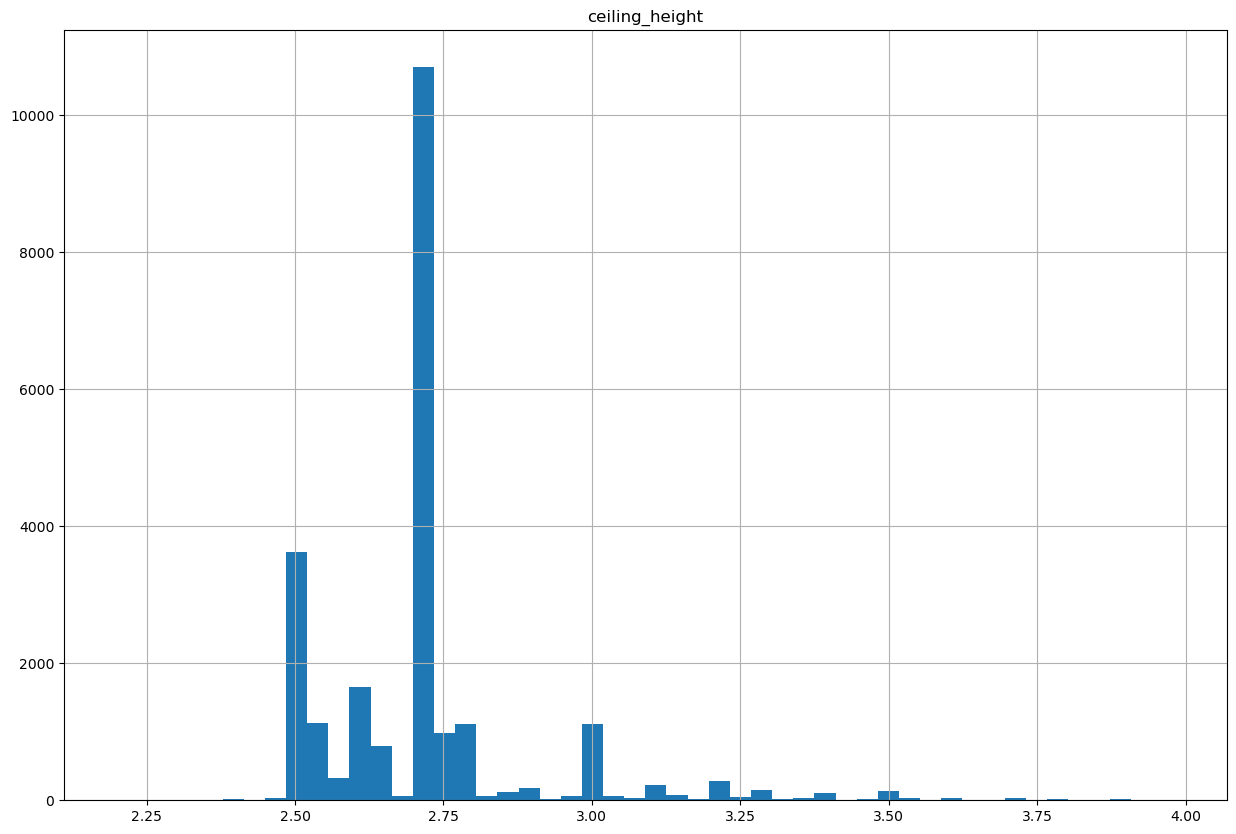

In [48]:
data.hist(column='ceiling_height', bins=50, figsize=(15,10))

Вывод: большая часть объявлений с высотой потолков 2,7 м.

Изучение этажей:

array([[<AxesSubplot:title={'center':'floor'}>]], dtype=object)

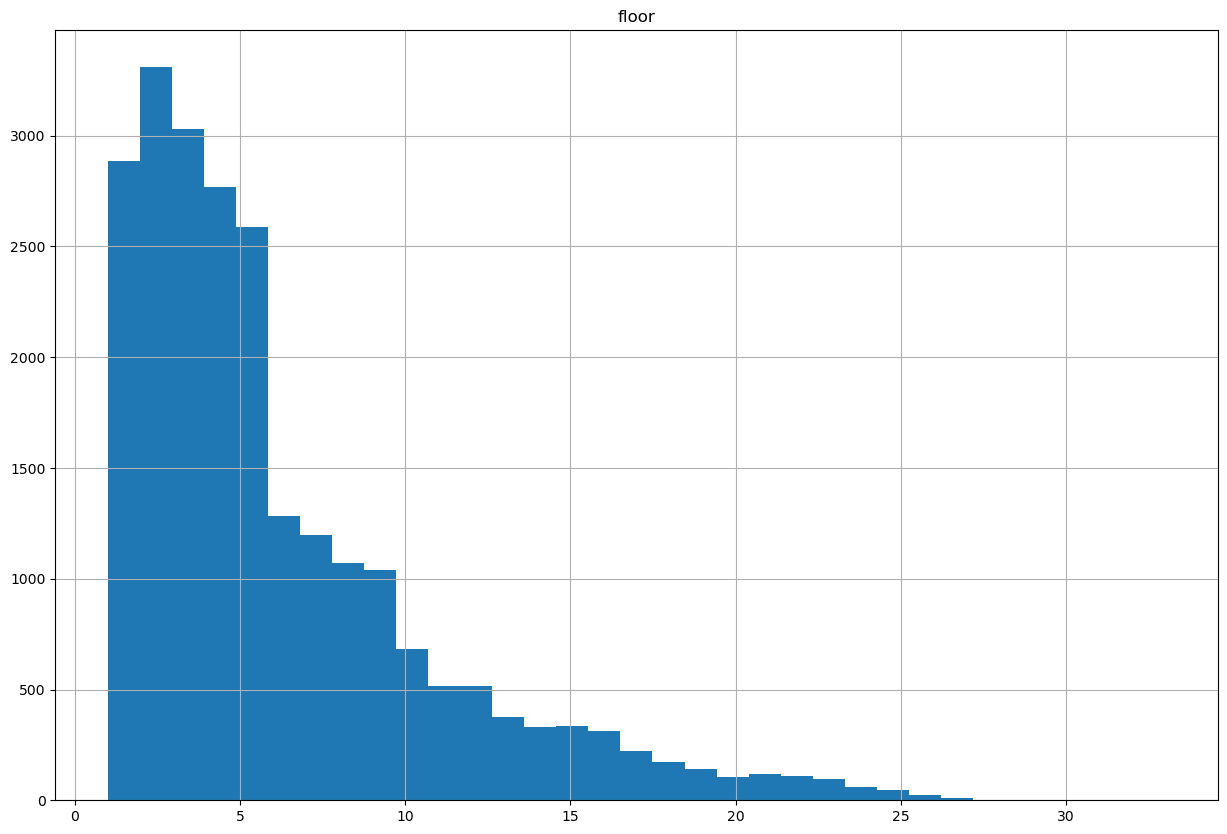

In [49]:
data.hist(column='floor', bins=33, figsize=(15,10))

Вывод: больше всего объявлений по продаже квартир с 1 по 5 этаж.

Изучение общего количества этажей:

array([[<AxesSubplot:title={'center':'floors_total'}>]], dtype=object)

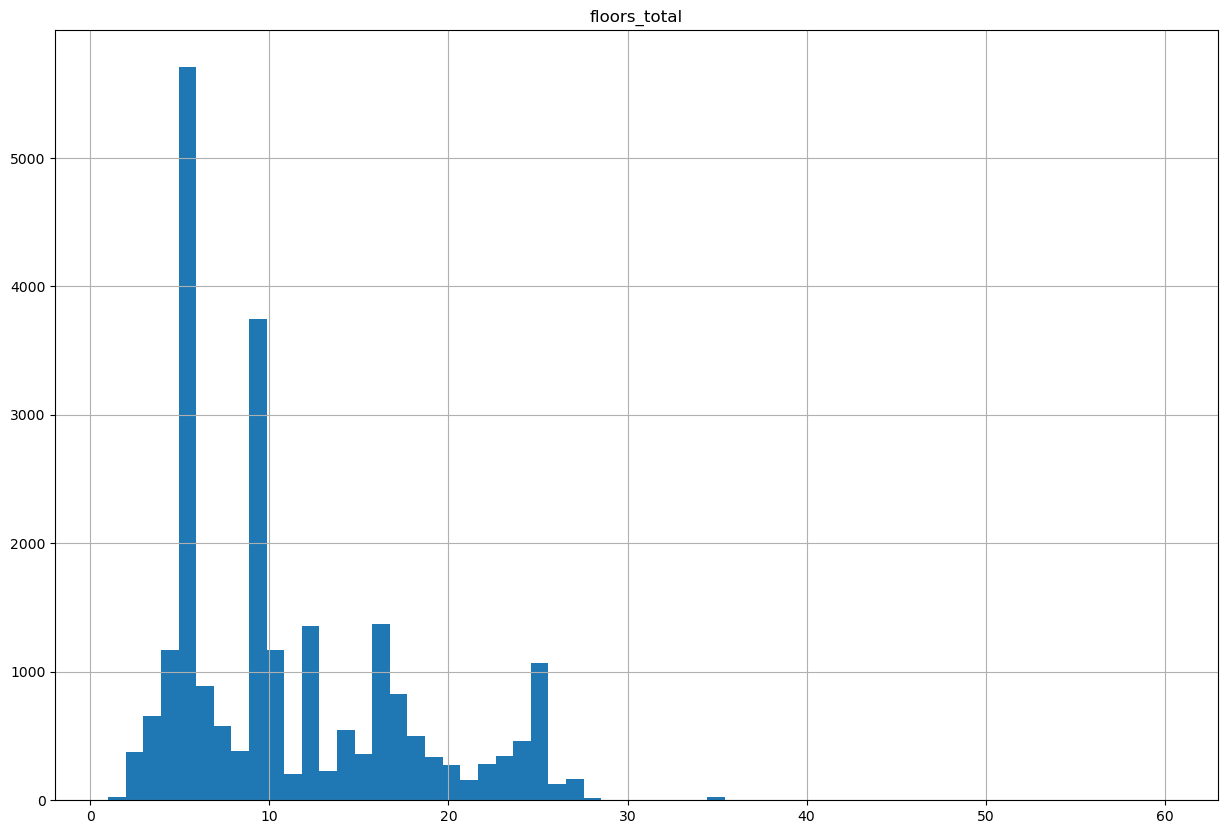

In [50]:
data.hist(column='floors_total', bins=60, figsize=(15,10))

Вывол: больше всего объявлений о продаже квартир в 5-и и 9-и этажных домах.

Изучение расстояния до центра города:

array([[<AxesSubplot:title={'center':'city_center_nearest'}>]],
      dtype=object)

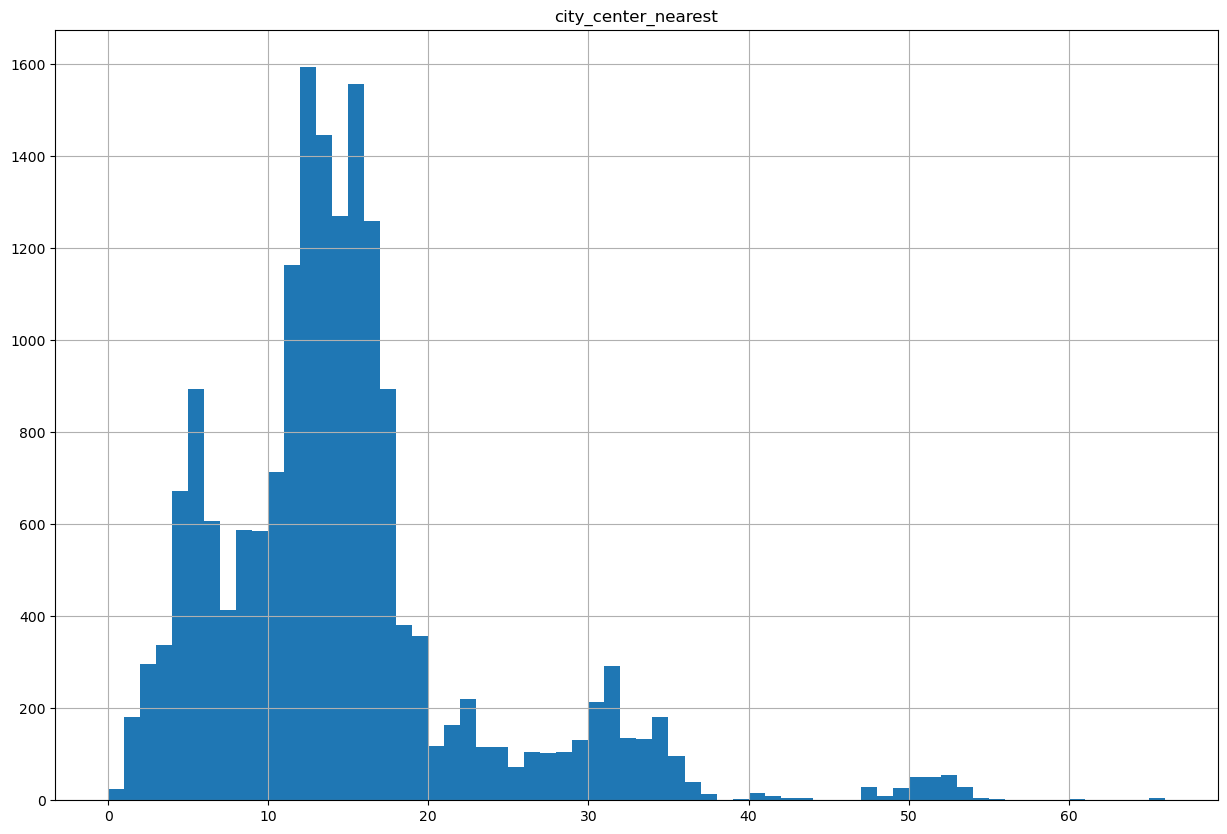

In [51]:
data.hist(column='city_center_nearest', bins=66, figsize=(15,10))

Вывод: больше всего объявлений о продаже квартир на расстоянии от центра с 11 км до 16 км. Это предварительный вывод, в данных  много пропущенных значений.

Изучение растояния до ближайшего аэропорта:

array([[<AxesSubplot:title={'center':'airports_nearest'}>]], dtype=object)

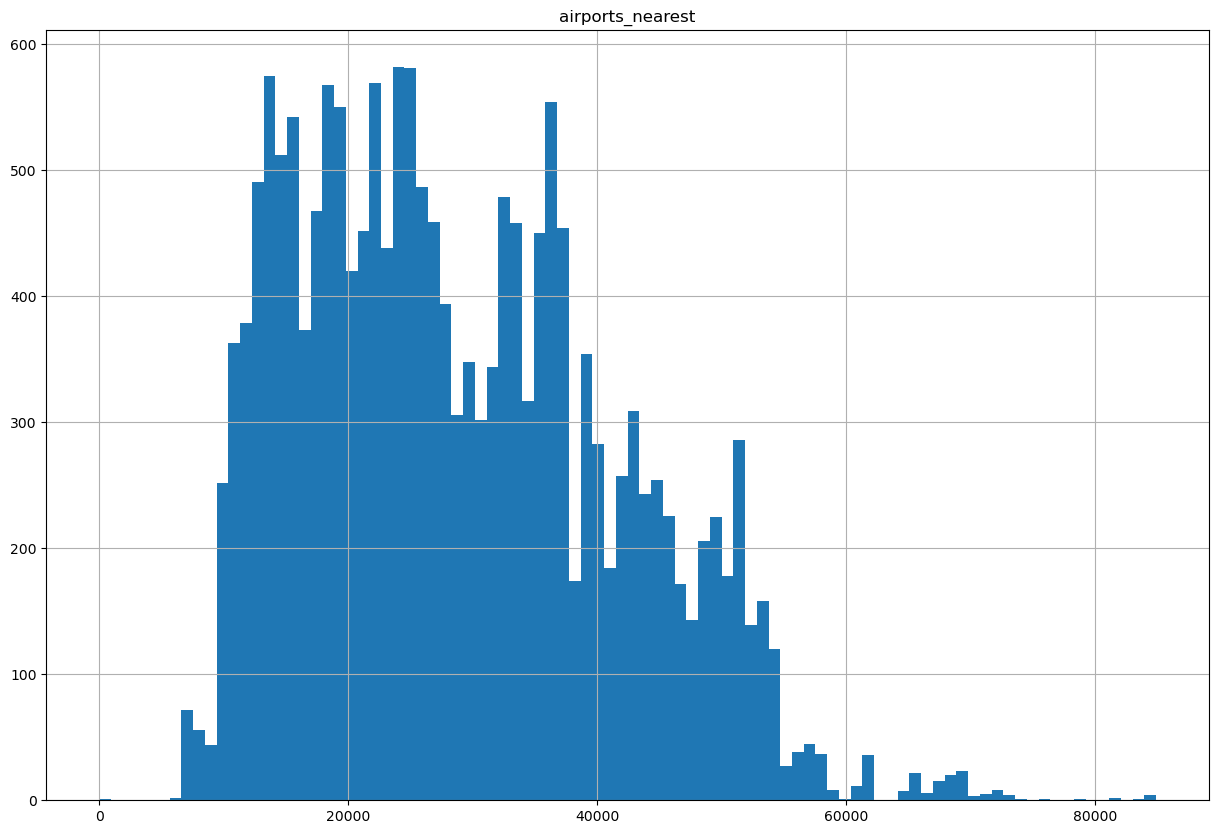

In [52]:
data.hist(column='airports_nearest', bins=90, figsize=(15,10))

Вывод:точную закономенрность выявить сложно, в данных много пропусков.

Изучение расстояния до ближайшего парка:

array([[<AxesSubplot:title={'center':'parks_nearest'}>]], dtype=object)

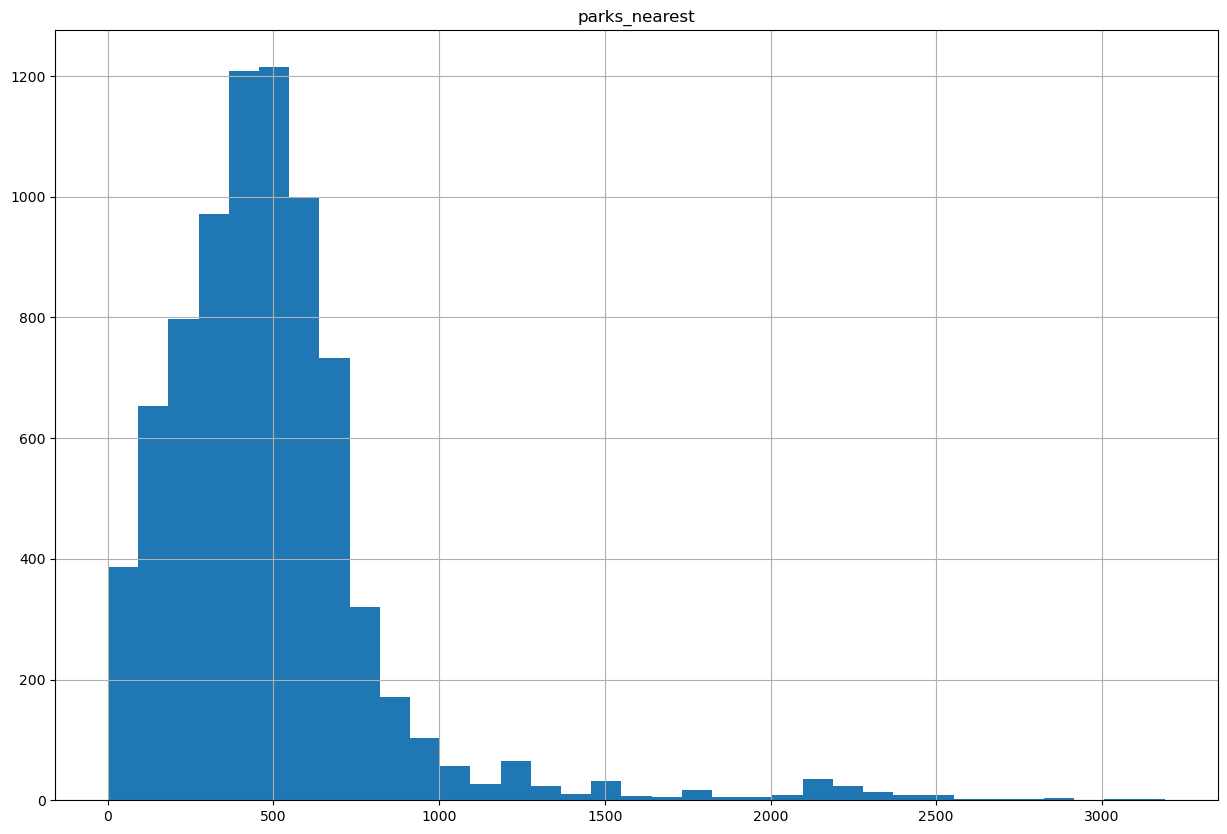

In [53]:
data.hist(column='parks_nearest', bins=35, figsize=(15,10))

Вывод: больше всего объявлений с расстоянием до ближайщего парка в 500 м. В данных много пропусков. 

Изучение первого дня объявлений:


array([[<AxesSubplot:title={'center':'first_day_exposition'}>]],
      dtype=object)

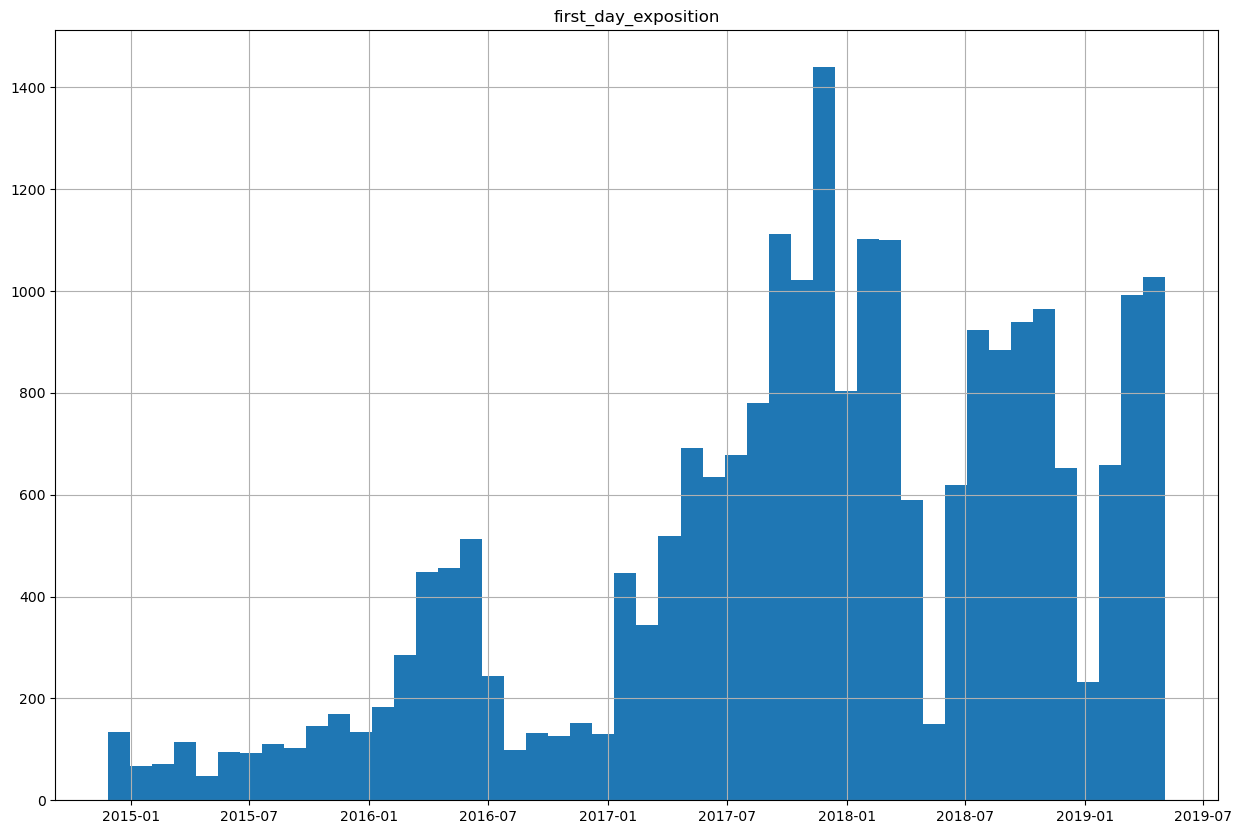

In [54]:
data.hist(column='first_day_exposition', bins=48, figsize=(15,10))

Вывод: с января 2017 года по июнь 2018 года скачёк роста кол-ва объявлений.


"Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
Постройте гистограмму.
Посчитайте среднее и медиану.

Создадим переменную со всеми значения data в которой days_exposition не равен нулю, с целью исключения действующих объявлений.

In [55]:
data_exposotion = data.query('days_exposition != 0')

<AxesSubplot:>

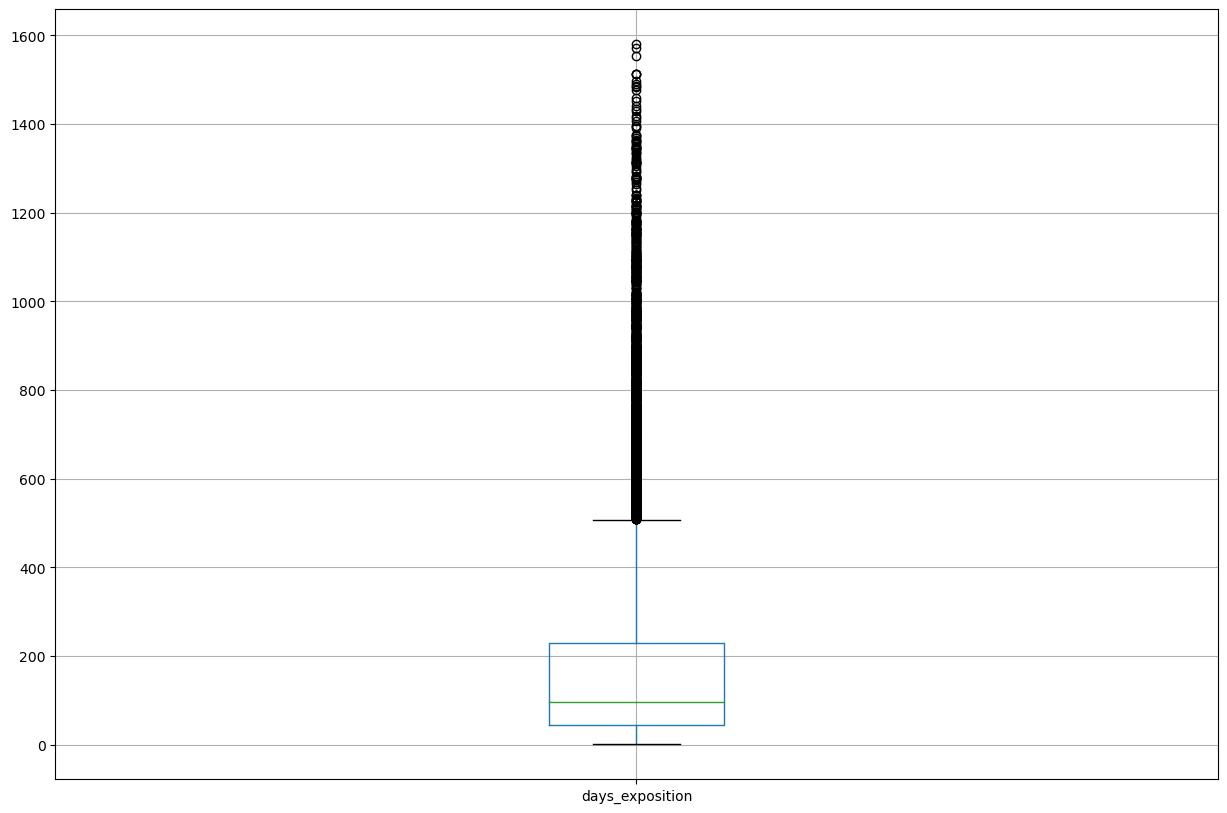

In [56]:
data_exposotion.boxplot(column='days_exposition', figsize=(15, 10))


In [57]:
data_exposotion['days_exposition'].describe()

count    20232.000000
mean       180.302639
std        219.282832
min          1.000000
25%         45.000000
50%         95.000000
75%        230.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Промежуточный вывод**


Изучив диаграмму размаха, можно сделать вывод, что необычно долгими продажами считаются те, которые были опубликованы более 500 дней, а необычно быстрыми в 1 день. Среднее значение продаж - 180 дней. Медианное значение - 95 дней.

Зависимость между общей площадью и общей стоимостью.

<AxesSubplot:xlabel='total_area', ylabel='last_price'>

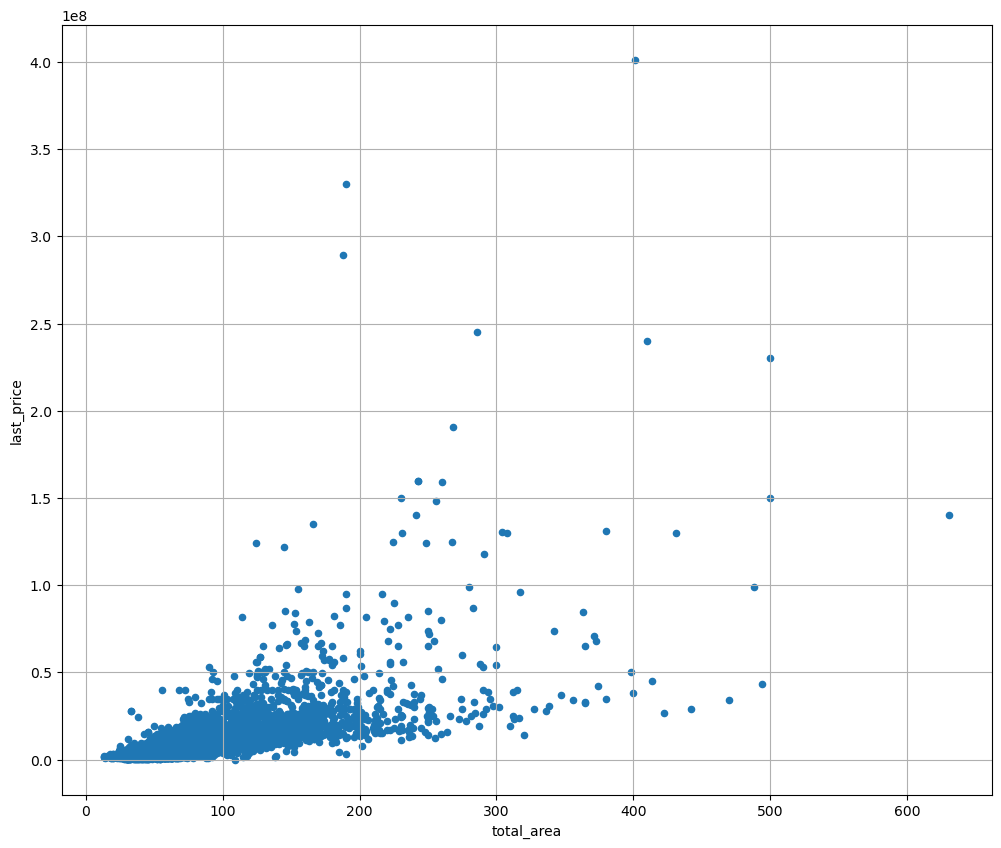

In [58]:
data.plot(x='total_area', y='last_price', kind='scatter',grid=True, figsize=(12, 10))

In [59]:
data['last_price'].corr(data['total_area'])

0.6771405250701618

Вывод: на основании полученного графика и коэффициента корреляции Пирсона, можно сделать вывод о наличии достаточно высокой связи между этими значенями.

Зависимость между площадью жилых помещений и общей стоимостью.

<AxesSubplot:xlabel='living_area', ylabel='last_price'>

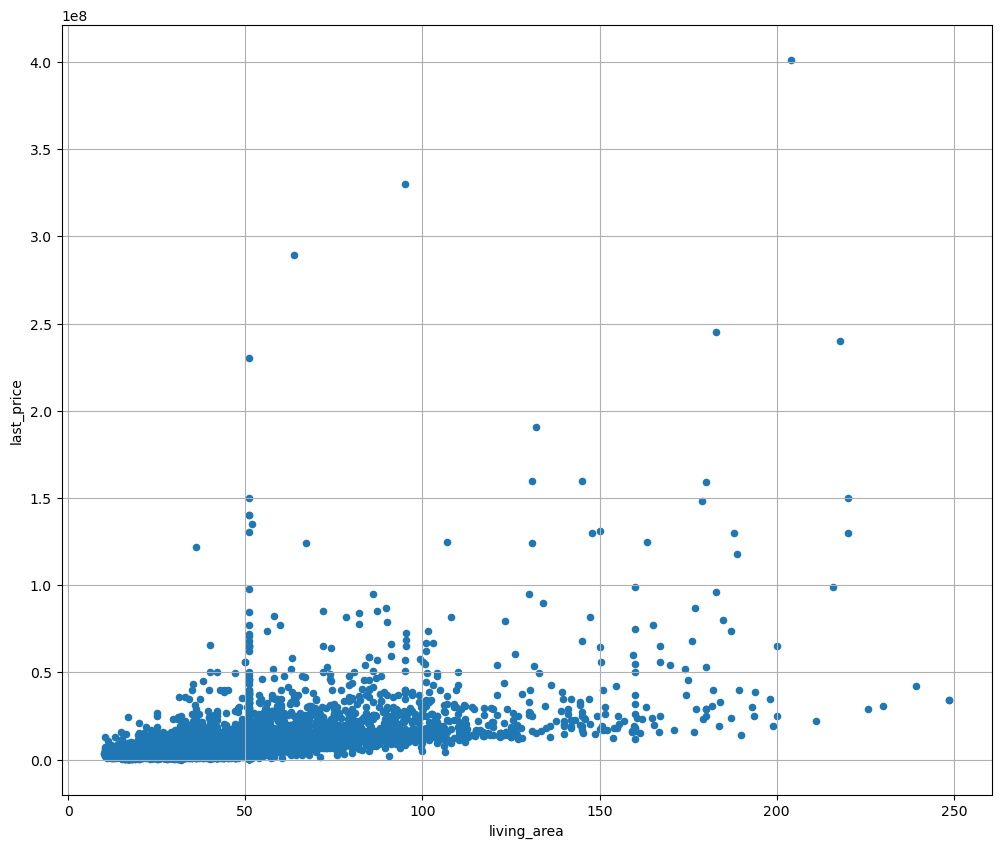

In [60]:
data.plot(x='living_area', y='last_price', kind='scatter',grid=True, figsize=(12, 10))

In [61]:
data['last_price'].corr(data['living_area'])

0.5280402632352261

Вывод: на основании полученного графика и коэффициента корреляции Пирсона, можно сделать вывод о наличии не слишком сильной связи между этими значенями.

Зависимость между площадью кухни и общей стоимостью.

<AxesSubplot:xlabel='kitchen_area', ylabel='last_price'>

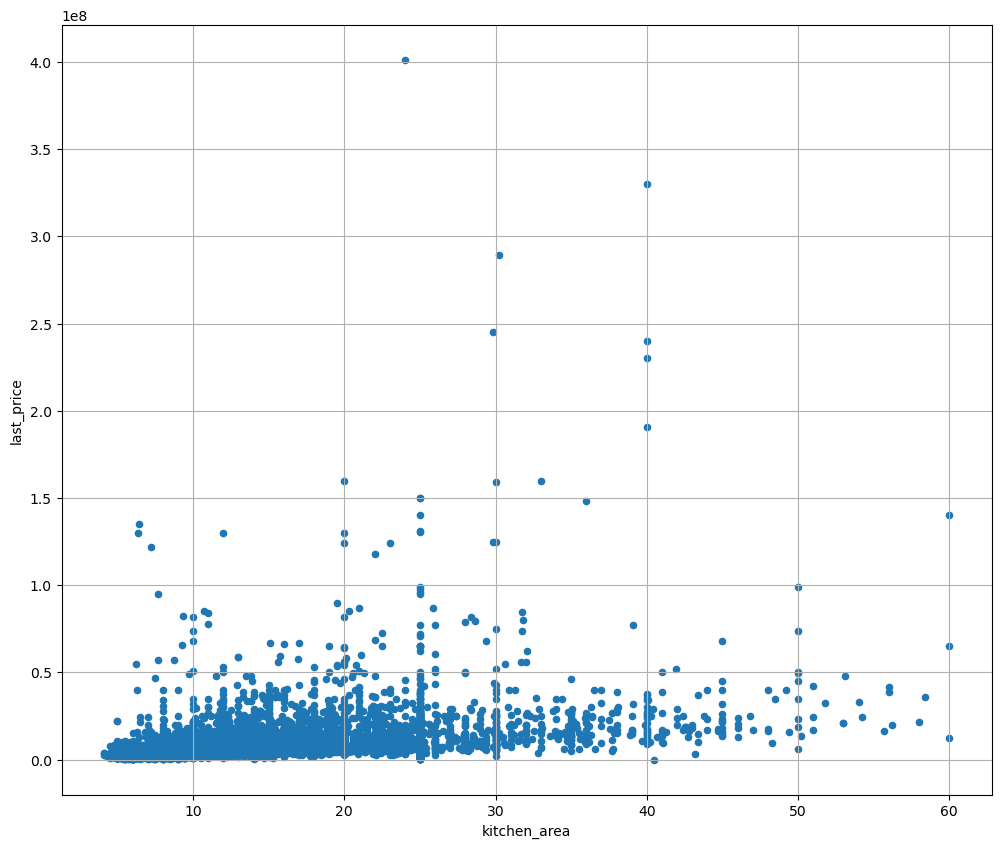

In [62]:
data.plot(x='kitchen_area', y='last_price', kind='scatter',grid=True, figsize=(12, 10))

In [63]:
data['last_price'].corr(data['kitchen_area'])

0.3282383387051552

Вывод: на основании полученного графика и коэффициента корреляции Пирсона, можно сделать вывод о наличии слабой связи между этими значенями.

Зависимость между количеством комнат и общей стоимостью.

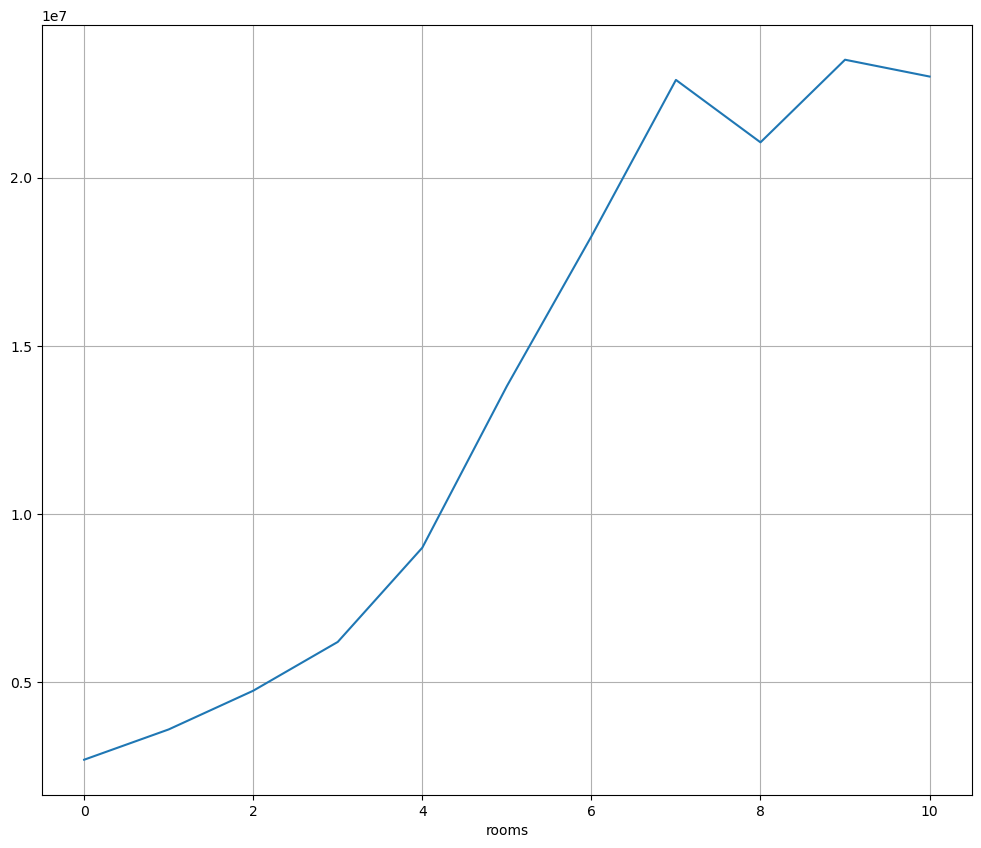

In [64]:
data.groupby('rooms')['last_price'].median().plot(grid=True, figsize=(12, 10));

Вывод: на основании полученного графика можно сделать вывод о росте стоимости недвижимости от студии до 5-ти комнатных квартир. Значения более чем с 10 комнатами можно принять за ошибку в данных из-за их малого количества. Предполагаю, что снижение цены недвижимости в диапазоне от 5-и и 10-и комнат, это объявления с большим количеством дней с последней публикации или недвижимость расположенная в менее популярных населённых пунктах.

Зависимость между типом этажа и общей стоимостью.

Вывод: на основании полученного графика можно предположить, что последний и другие этажи дороже первого.

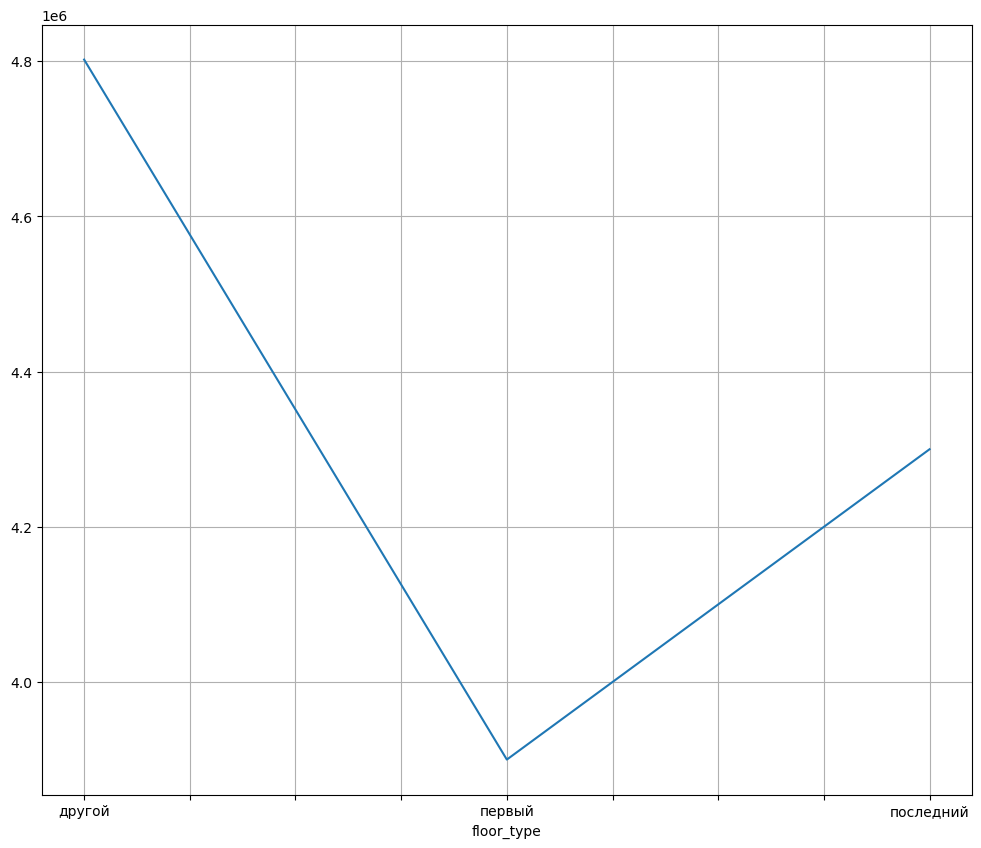

In [65]:
data.groupby('floor_type')['last_price'].median().plot(grid=True, figsize=(12, 10));

Зависимость между днем публикации и общей стоимостью.

<AxesSubplot:xlabel='posting_day'>

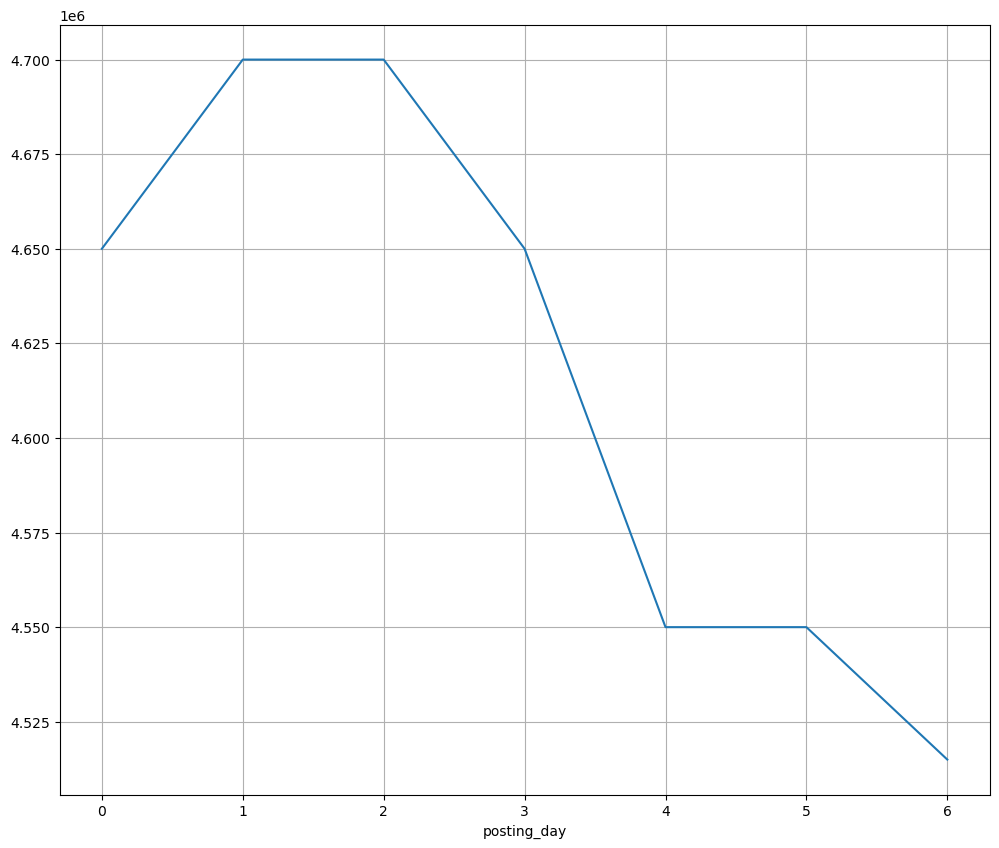

In [66]:
data.groupby('posting_day')['last_price'].median().plot(grid=True, figsize=(12, 10))

In [67]:
data['last_price'].corr(data['posting_day'])

0.0001731949887202835

Вывод: на основании полученного графика и коэффициента корреляции Пирсона, можно сделать вывод об отсутствии взаимосвязи.

Зависимость между месяцем публикации и общей стоимостью.

<AxesSubplot:xlabel='posting_month'>

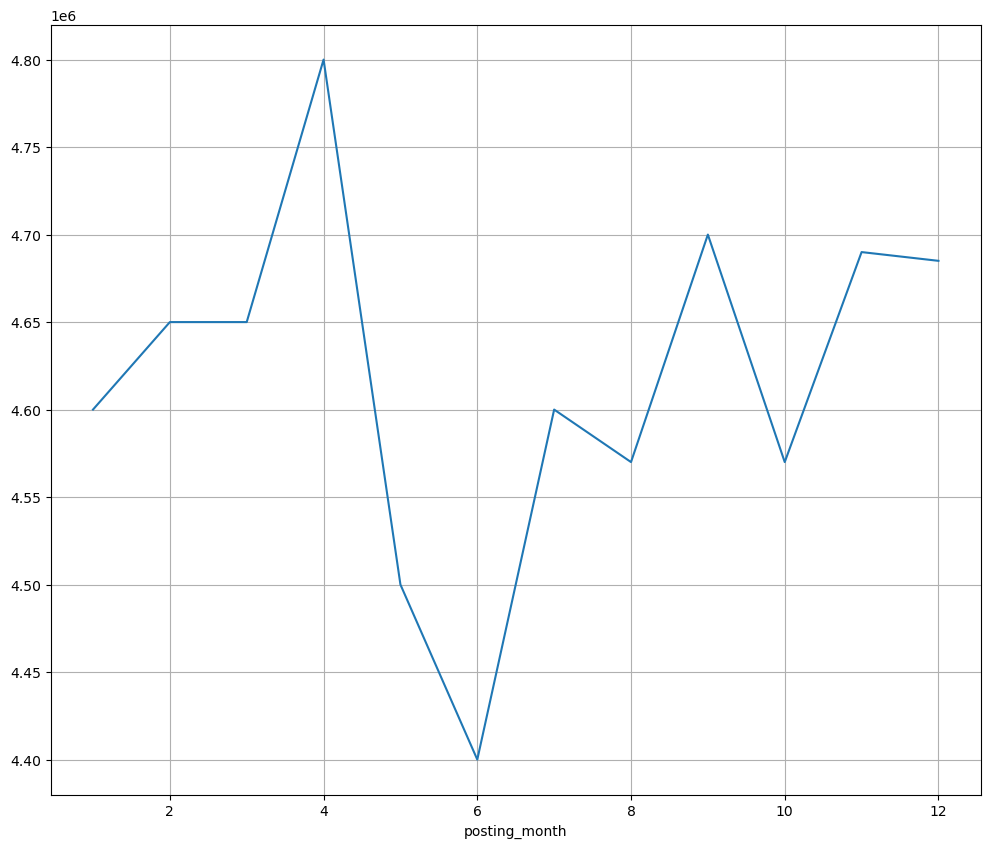

In [68]:
data.groupby('posting_month')['last_price'].median().plot(grid=True, figsize=(12, 10))

In [69]:
data['last_price'].corr(data['posting_month'])

-0.0041817068404279645

Вывод: на основании полученного графика и коэффициента корреляции Пирсона, можно сделать вывод об отсутствии взаимосвязи.

Зависимость между годом публикации и общей стоимостью.

<AxesSubplot:xlabel='posting_year'>

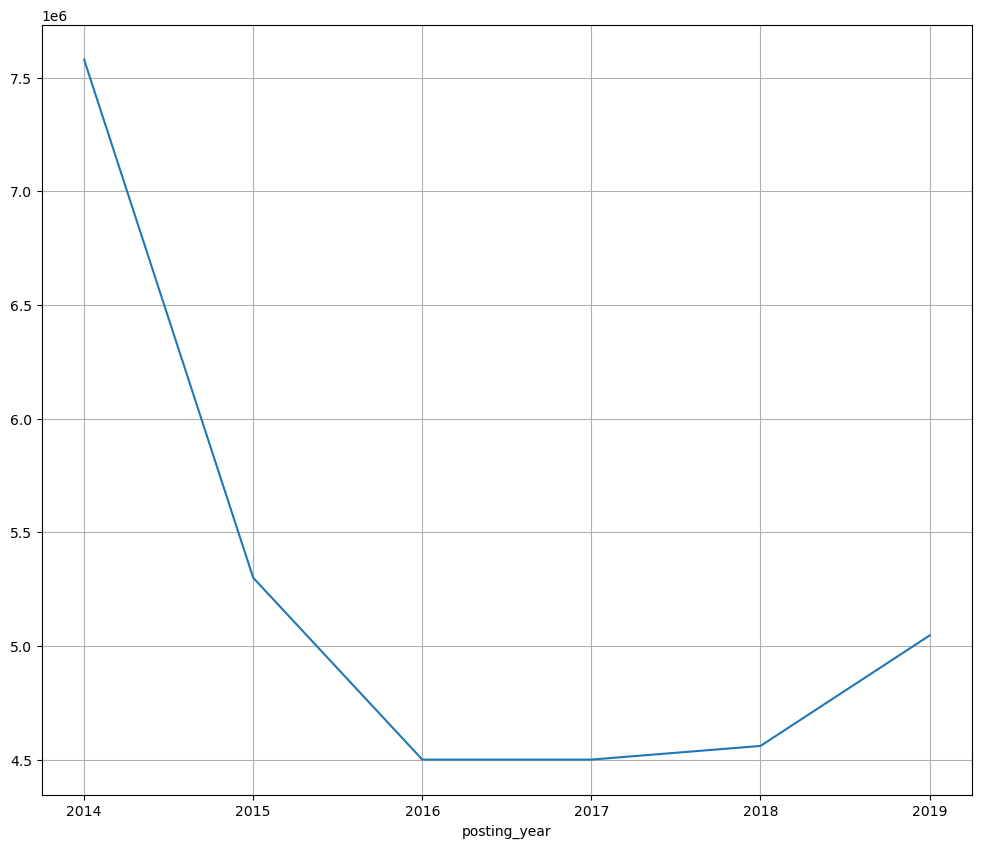

In [70]:
data.groupby('posting_year')['last_price'].median().plot(grid=True, figsize=(12, 10))

In [71]:
data['last_price'].corr(data['posting_year'])

-0.04676717946631602

Вывод: на основании коэффициента корреляции Пирсона зависимости нет. Опираясь на график видно, что стоимость с 2014 по 2016 падала, а начиная с 2017 года идёт в рост.

**Промежуточный вывод**


Обшая стоимость недвижимости имеет наибольшую взаимосвязь с общей площадью, жилой площадью и расположением этажа.


Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name

In [72]:
data['locality_name'].value_counts().head(10)

Санкт-Петербург    15497
Мурино               580
Кудрово              468
Шушары               438
Всеволожск           395
Пушкин               366
Колпино              338
Парголово            327
Гатчина              305
Выборг               232
Name: locality_name, dtype: int64

In [73]:
mcp = data.pivot_table(index='locality_name', values='square_price', aggfunc=['mean','count'])
mcp.columns=['mean_price','post_count']
mcp = mcp.query('post_count >= 237')
mcp.sort_values(by='post_count', ascending=False)

,mean_price,post_count
locality_name,,
Санкт-Петербург,114219.696585,15497
Мурино,85872.567603,580
Кудрово,95261.777778,468
Шушары,78577.015091,438
Всеволожск,68617.058810,395
Пушкин,102774.571776,366
Колпино,75424.579112,338
Парголово,90175.913089,327
Гатчина,68811.372590,305


In [74]:
data.groupby('locality_name').agg({'balcony':'count', 'last_price':'median'}) \
    .sort_values(by = 'balcony', ascending = False) \
    .head(10)

,balcony,last_price
locality_name,,
Санкт-Петербург,15497,5500000.0
Мурино,580,3400000.0
Кудрово,468,3887500.0
Шушары,438,3950000.0
Всеволожск,395,3450000.0
Пушкин,366,5165000.0
Колпино,338,3600000.0
Парголово,327,4100000.0
Гатчина,305,3090000.0


In [75]:
mcp[mcp['mean_price'] == mcp['mean_price'].max()]

,mean_price,post_count
locality_name,,
Санкт-Петербург,114219.696585,15497


In [76]:
mcp[mcp['mean_price'] == mcp['mean_price'].min()]

,mean_price,post_count
locality_name,,
Всеволожск,68617.05881,395


**Промежуточный вывод**


Из полученных данных видно, что из 10-ки лидером по стоимости квадратного метра является Санкт-Петербург. Выборг занял непочетное 10 место.

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [77]:
spb = data.query('locality_name == "Санкт-Петербург"')
spb = spb.dropna(subset=['city_center_nearest'])
spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_price,posting_day,posting_month,posting_year,floor_type
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,False,...,1.0,482.0,2.0,755.0,NaN,120370.37,3,3,2019,другой
2,10,5196000.0,56.00,2015-08-20,2,2.70,5.0,34.3,4,False,...,1.0,90.0,2.0,574.0,558.0,92785.71,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24,3,2.70,14.0,51.0,9,False,...,2.0,84.0,3.0,234.0,424.0,408176.10,4,7,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,False,...,2.0,112.0,1.0,48.0,121.0,100000.00,1,6,2018,другой
7,5,7915000.0,71.60,2019-04-18,2,2.70,24.0,51.0,22,False,...,0.0,NaN,0.0,NaN,NaN,110544.69,3,4,2019,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,False,...,1.0,353.0,2.0,652.0,29.0,100566.57,2,2,2018,другой
23690,3,5500000.0,52.00,2018-07-19,2,2.70,5.0,31.0,2,False,...,1.0,300.0,0.0,NaN,15.0,105769.23,3,7,2018,другой
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,0.0,NaN,1.0,806.0,519.0,129903.98,3,10,2016,другой
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,1.0,796.0,3.0,381.0,NaN,72490.85,1,3,2017,другой


In [78]:
spb['city_center_nearest'].value_counts()

12.0    1594
15.0    1557
13.0    1445
14.0    1271
16.0    1260
11.0    1163
5.0      894
17.0     867
10.0     713
4.0      672
6.0      606
8.0      587
9.0      586
7.0      413
3.0      337
2.0      297
18.0     261
22.0     202
1.0      180
19.0     154
21.0     117
23.0      85
20.0      47
26.0      38
24.0      26
25.0      25
0.0       25
28.0       7
29.0       6
27.0       2
Name: city_center_nearest, dtype: int64

In [79]:
center_range = spb.pivot_table(index='city_center_nearest', values='last_price', aggfunc='median')
center_range

,last_price
city_center_nearest,
0.0,27000000.0
1.0,11150000.0
2.0,9850000.0
3.0,8418000.0
4.0,9125000.0
5.0,9438000.0
6.0,8783909.5
7.0,7800000.0
8.0,7400000.0


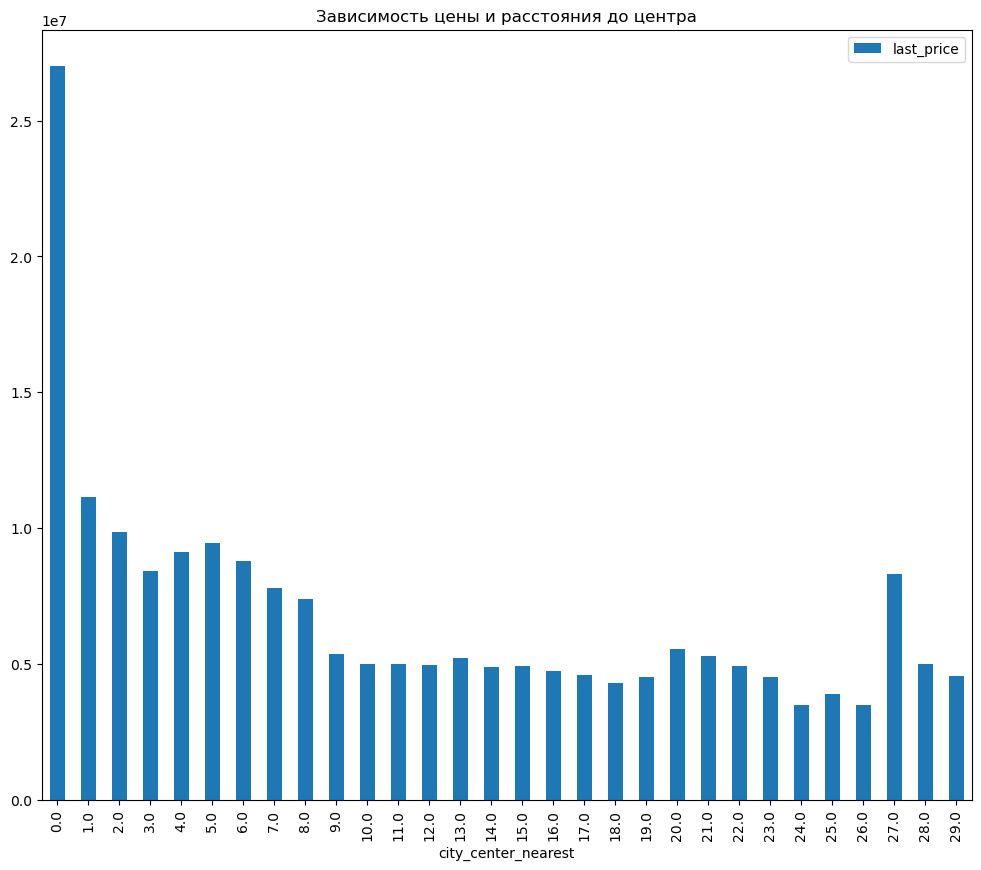

In [80]:
center_range.plot(kind='bar',figsize=(12,10), title = 'Зависимость цены и расстояния до центра');

**Промежуточный вывод**


Исходя из графика и полученных расчётов стоимости километража, наблюдается тендеция роста стоимости неджижимости к центру. Из полученных результатов можно исключить значения с 27 км из-за малого количества данных. С 11 км по 16 км стоимость примерно одинаковая.

### Общий вывод

1. В имеющихся данных много пропусков.
2. Можно сделать вывод, что необычно долгими продажами считаются те, которые были опубликованы более 500 дней назад, а необычно быстрыми в 1 день. Среднее значение продаж - 180 дней. Медианное значение - 95 дней.
3. Обшая стоимость недвижимости имеет наибольшую взаимосвязь с общей площадью, жилой площадью и расположением этажа.
4. Лидером по стоимости квадратного метра является Санкт-Петербург.
5. Стоимость недвижимости растет по мере её близости к центру Санкт-Петербурга.